<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S11_C1_Emojis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Notebook to release Sentiment Analysis - prediction
# Iván Andrés Trujillo abella
# ivantrujillo1229@gmail.com

In [ ]:
url = "https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/tweets(ai-page).csv"

In [ ]:
pip install emoji --upgrade

In [ ]:
import emoji
import pandas as pd
import numpy as np

In [ ]:
s = '😡'
code = 'U000{:X}'.format(ord(s))
print(code)

U0001F621


Unico  emoji

es U + 8 caracteres

In [ ]:
matches = ["U0001F621", "U0001F607", "U0001F61A", "U0001F61a",
           "U0001F603", "U0001F60B", "U0001F643"]
emojis = [emoji.replace('U', r"\U").encode().decode('unicode-escape') for emoji in matches]
print(emojis)

['😡', '😇', '😚', '😚', '😃', '😋', '🙃']


In [ ]:
print(emoji.is_emoji("\U0001F607")) # verifica si es emoji desde el codigo
emoji.is_emoji("😡") # verifica si es emoji desde el simbolo

True


True

In [ ]:
emoji.distinct_emoji_list("\U0001F607 hello world")

['😇']

In [ ]:
df = pd.read_csv(url)

In [ ]:
print(df.head(15))

                                                tweet
0                                miBanco D q se trata
1   ¿Cómo proteger los negocios de la inflación? E...
2                                           miBanco 😁
3   miBanco En varias ocasiones informe que autori...
4                  miBanco miBancoApp Ya está caído 😕
5   miBanco Ya, vamos a ver en cuántos días obteng...
6   miBanco, miBancoApp, y ahorro a la mano, la es...
7   Para q sirve pedir turno anticipadamente en mi...
8     miBanco Para ver de qué forma me pueden ayudar.
9   Aventuras con miBanco, les digo que voy a perd...
10   miBanco Día de pago de nómina y miBanco valie...
11  ⚠️ Av. Regional a la altura de miBanco, #Movil...
12  💳Ingresa al Sistema pagando con tus tarjetas d...
13  Señores miBanco   y si existe pendiente de la ...
14  miBanco  Dejen de responder mierda que no func...


In [ ]:
df['emoticons']='None'
for index in df.index:
    if len(emoji.distinct_emoji_list(df.loc[index,'tweet']))>0:
      # # distinct distinto a
        im = emoji.distinct_emoji_list(df.loc[index,'tweet'])
        df.loc[index, 'emoticons'] = im[0] # take the first emoticon

df  = df[df['emoticons']!='None'].reset_index(drop=True)

def label_emoji(emojis):
    labels = {
        'Angry': ['🤬', '😡', '😤', '🤯', '👿', '💢', '😠', '👊'],
        'Smile': ['😁', '🤗', '😀', '😃', '😄', '😊', '🙂', '😅', '😆'],
        'Nice': ['😎', '♥️', '👍', '😍', '👍🏾', '😻', '🙏🏽', '🙌🏼',
                 '👏🏻', '🦾', '🤘', '💪', '🌟', '✨', '🎉', '💖', '🥰', '🎊'],
        'No nice': ['🖕🏼', '🤡', '🤦', '👎🏾', '🥲', '😰', '💩', '🤢', '🤮', '😒'],
        'Sad': ['😔', '😩', '😢', '😫', '😭', '😞', '😟', '😖', '😿', '😓'],
        'Love': ['❤️', '💕', '💞', '💓', '💗', '💝', '💘', '💑', '😍'],
        'Funny': ['😂', '🤣', '😹', '😆', '😜', '🤪', '😝', '🙃'],
        'Scared': ['😨', '😰', '😱', '😧', '😦', '🙀', '👻'],
        'Celebration': ['🎉', '🎊', '🎁', '🎈', '🥳', '💃', '🕺']}


    class_name = 'Another'
    for emoticon in emojis:
        if emojis =='None':
            return 'None'
        for label in labels:
            if emoticon in labels[label]:
                class_name = label
    return class_name

In [ ]:
df['y'] = df['emoticons'].apply(lambda x: label_emoji(x))

In [ ]:
# Mejora 1. incluir en los labels los emoticones que considere pertinente segun el sentimiento
# por ejemplo esta 🤣deberia estar en smile
print(df.head(20))

                                                tweet emoticons        y
0   ¿Cómo proteger los negocios de la inflación? E...         👉  Another
1                                           miBanco 😁         😁    Smile
2                  miBanco miBancoApp Ya está caído 😕         😕  Another
3   ⚠️ Av. Regional a la altura de miBanco, #Movil...        ⚠️  Another
4   💳Ingresa al Sistema pagando con tus tarjetas d...         💳  Another
5   miBanco  Dejen de responder mierda que no func...         😤    Angry
6   Aretes Retro \nRef 34059\n$ 70\nOro Laminado ⚜...        ✈️  Another
7   ¿Cómo proteger los negocios de la inflación? E...         👉  Another
8   Con un crédito sostenible otorgado por miBanco...         👉  Another
9   ¿Recuerdas este clásico de ETERNAL? 🧛‍♂️\n¡Pro...      🧛‍♂️  Another
10  Hmm no pues que novedad 🙃, lo raro es cuando f...         🙃    Funny
11  📣Ahora puedes negociar las siguientes acciones...         💻  Another
12  miBanco 👏 👏 👏 👏 felicitaciones!!!! Cada día va.

In [ ]:
# Using regular expressions to clean tweets
# Remove emojis
df['tweet'] = df['tweet'].apply(lambda x: emoji.replace_emoji(x, replace=''))
# Convert to lowercase
df['tweet'] = df['tweet'].apply(lambda x: x.lower())
# Remove specific keywords like 'miBanco' or 'Mibanco'
df['tweet'] = df['tweet'].replace('mi[Bb]anco', "", regex=True)
# Remove URLs
df['tweet'] = df['tweet'].replace(r'https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_\+.~#?&\/=]*)$', "", regex=True)
df['tweet'] = df['tweet'].replace(r'\bhttps://t.co/[a-z0-9]*\b', "", regex=True)
# Remove digits, mentions (@), and hashtags (#)
df['tweet'] = df['tweet'].replace(r'[\d@#]', "", regex=True)
# Remove extra whitespace
df['tweet'] = df['tweet'].str.strip()
df['tweet'] = df['tweet'].replace(r'\s+', " ", regex=True)


In [ ]:
# Mejora 2.
# Proponer otra expresion regular para limpiar la columna tweet
print(df.head(20))

                                                tweet emoticons        y
0   ¿cómo proteger los negocios de la inflación? e...         👉  Another
1                                                             😁    Smile
2                                   app ya está caído         😕  Another
3   av. regional a la altura de , movilidadmedellí...        ⚠️  Another
4   ingresa al sistema pagando con tus tarjetas dé...         💳  Another
5   dejen de responder mierda que no funciona con ...         😤    Angry
6   aretes retro ref $ oro laminado envíos naciona...        ✈️  Another
7   ¿cómo proteger los negocios de la inflación? e...         👉  Another
8   con un crédito sostenible otorgado por , enel ...         👉  Another
9   ¿recuerdas este clásico de eternal? ¡pronto lo...      🧛‍♂️  Another
10  hmm no pues que novedad , lo raro es cuando fu...         🙃    Funny
11  ahora puedes negociar las siguientes acciones ...         💻  Another
12  felicitaciones!!!! cada día vamos mejorando má.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## To modeling
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from wordcloud import WordCloud


# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import re

# Random Forest
from sklearn.ensemble import RandomForestClassifier



In [ ]:
df = df[df['y']!='Another'] # elimina todos los 'Another'
df.reset_index(inplace=True, drop=True )

In [ ]:
df['y'].value_counts()

,count
y,
Angry,1220
Funny,1125
No nice,1096
Sad,727
Smile,436
Nice,371
Love,110
Scared,84
Celebration,45


In [ ]:
df['feeling'] = np.where((df['y']=='Smile') | (df['y']=='Nice') | (df['y']=='Funny') | (df['y']=='Love') | (df['y']=='Celebration'), 'Positive', 'Negative')

<ipython-input-19-d4d6f235b0c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feeling'] = np.where((df['y']=='Smile') | (df['y']=='Nice') | (df['y']=='Funny') | (df['y']=='Love') | (df['y']=='Celebration'), 'Positive', 'Negative')


In [ ]:
df['feeling'].value_counts()

,count
feeling,
Negative,3127
Positive,2087


In [ ]:
df

,tweet,emoticons,y,feeling
0,,😁,Smile,Positive
1,dejen de responder mierda que no funciona con ...,😤,Angry,Negative
2,"hmm no pues que novedad , lo raro es cuando fu...",🙃,Funny,Positive
3,realizamos tus envios desde perú a colombia a ...,✨,Nice,Positive
4,a mi me da pena abrir alguna tendencia en tw p...,😅,Smile,Positive
...,...,...,...,...
5209,a mi me hacen falta mil y tampoco veo ningún m...,🤯,Angry,Negative
5210,esto no es cierto! sigue caída,😡,Angry,Negative
5211,app hoy estoy tratando de hacer una transferen...,💩,No nice,Negative
5212,"hola, olvide la clave de .",👍,Nice,Positive


In [ ]:
emojis = df['emoticons'].unique()
base_of_text={}
for emo in emojis:
    base_of_text[emo] = "".join(df[df['emoticons']==emo]['tweet'].values)

In [ ]:
df['emoticons'].unique()

array(['😁', '😤', '🙃', '✨', '😅', '🤣', '🙂', '🤗', '😠', '😔', '😡', '😭', '🤬',
       '😂', '😓', '😞', '😒', '🤡', '🤦🏾\u200d♂️', '😫', '👍', '💩', '😢', '🥲',
       '😩', '😆', '😍', '💕', '😜', '🥰', '💪🏻', '🤪', '🤦🏽\u200d♀️',
       '🤦🏽\u200d♂️', '🤦🏻\u200d♂️', '😎', '😱', '🤦\u200d♂️', '🤦🏻\u200d♀️',
       '🎊', '👍🏼', '😊', '🎉', '💃', '😨', '💪', '🤦🏼\u200d♀️', '🤦', '😄', '🤮',
       '😖', '😰', '👍🏾', '🤢', '😟', '👍🏻', '😀', '😻', '🤦🏽', '🤘', '🤯', '👊',
       '🤦🏻', '🤦🏿\u200d♀️', '💖', '🤦🏾\u200d♀️', '🤦🏼\u200d♂️', '🥳',
       '🤦\u200d♀️', '🙀', '💝', '🕺', '😿', '💗', '😃', '🤦🏿\u200d♂️', '🎁', '😹',
       '😝', '🌟', '💪🏼', '💪🏽', '👊🏽', '👍🏽', '💞', '💘', '😧', '💃🏽', '👊🏻',
       '🤦🏼\u200d♂', '👻', '💪🏾', '🤘🏻', '😦', '💃🏻', '💓'], dtype=object)

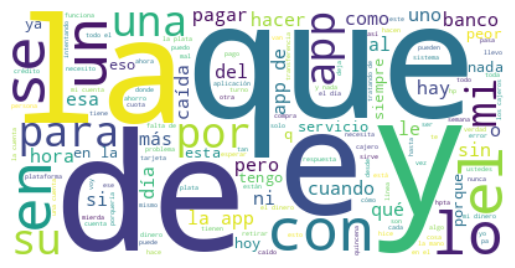

In [ ]:
wc = WordCloud(background_color="white", repeat=True)
wc.generate(base_of_text['😡'])
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
en_stops = set(stopwords.words('spanish'))
en_stops

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [ ]:
all_words = ['There', 'is', 'a', 'tree','near','the','river', 'cómo','tan', 'alguna', 'casi', 'vaya']
for word in all_words:
    if word not in en_stops:
        print(word)
custom_stop_words = ['alguna', 'near', 'cómo',  'casi', 'vaya', ',']  # Replace with your custom stop words
en_stops.update(custom_stop_words)
for word in all_words:
    if word not in en_stops:
        print(word, 'added')

There
is
tree
near
the
river
cómo
tan
alguna
casi
vaya
There added
is added
tree added
the added
river added
tan added


In [ ]:
df

,tweet,emoticons,y,feeling
0,,😁,Smile,Positive
1,dejen de responder mierda que no funciona con ...,😤,Angry,Negative
2,"hmm no pues que novedad , lo raro es cuando fu...",🙃,Funny,Positive
3,realizamos tus envios desde perú a colombia a ...,✨,Nice,Positive
4,a mi me da pena abrir alguna tendencia en tw p...,😅,Smile,Positive
...,...,...,...,...
5209,a mi me hacen falta mil y tampoco veo ningún m...,🤯,Angry,Negative
5210,esto no es cierto! sigue caída,😡,Angry,Negative
5211,app hoy estoy tratando de hacer una transferen...,💩,No nice,Negative
5212,"hola, olvide la clave de .",👍,Nice,Positive


In [ ]:
tweet  =  df.loc[0,'tweet']

In [ ]:
custom_stop_words = ['casi', 'pronto', 'tan',  'seguro', 'cúando']  # add to improve!
en_stops.update(custom_stop_words)

def remove_stopwords(tweet):
    new = []
    for word in tweet.split():
        if word not in en_stops:
            new.append(word)
    return " ".join(new)

In [ ]:
remove_stopwords('cada día expreso mi inconformidad con la entidad')

'cada día expreso inconformidad entidad'

In [ ]:
df['tweet'] =  df['tweet'].apply(lambda x : remove_stopwords(x))

In [ ]:
emojis = df['emoticons'].unique()
base_of_text={}
for emo in emojis:
    base_of_text[emo] = "".join(df[df['emoticons']==emo]['tweet'].values)

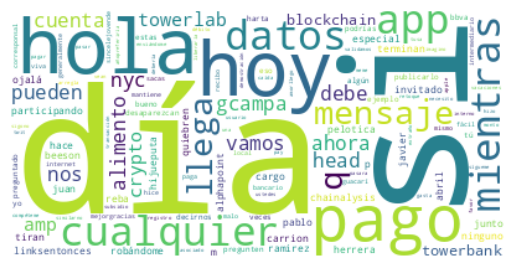

In [ ]:
wc = WordCloud(background_color="white", repeat=True)
wc.generate(base_of_text['😁'])
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
def remove_laughs(tweet):
    new = []
    for word in tweet.split():
        if bool(re.fullmatch('a*ja+j[ja]*', word))==False:
            new.append(word)
    return ' '.join(new)

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x : remove_laughs(x))

In [ ]:
def remove_term(regex, tweet):
    new = []
    for word in tweet.split():
        if bool(re.fullmatch(regex, word))==False:
            new.append(word)
    return ' '.join(new)

In [ ]:
remove_term('app', 'app no funciona')

'no funciona'

In [ ]:
df['tweet'] =  df['tweet'].apply(lambda x: remove_term('miB[b]anco',x))

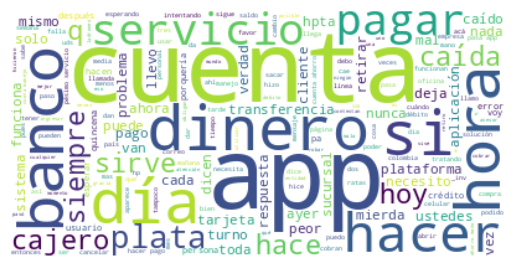

In [ ]:
emojis = df['emoticons'].unique()
base_of_text={}
for emo in emojis:
    base_of_text[emo] = "".join(df[df['emoticons']==emo]['tweet'].values)
wc = WordCloud(background_color="white", repeat=True)
wc.generate(base_of_text['😡'])
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
df['feeling'] = np.where(df['feeling']=='Positive',1 ,0)
X  = df['tweet']
y = df['feeling']
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size = 0.25,  random_state=666)

In [ ]:
df= df[df['tweet'].apply(lambda tweet: len(str(tweet))!=0)]
df.reset_index(inplace=True, drop=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
### Logistic Regression
def grid_search_lr(X_train, y_train):
    model = LogisticRegression(random_state=666, max_iter=1000)
    class_weight =  [{1:0.5, 0:0.5}]
    solvers = ['liblinear']
    penalty = ['l2','l1', ]
    c_values = [1000, 100,50, 10,1,0.1 ]
    grid = dict(solver=solvers,penalty=penalty,C=c_values, class_weight= class_weight)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scorer = make_scorer(f1_score, average = 'weighted')
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring=scorer,error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    best_params = grid_result.best_params_
    return best_params

In [ ]:
# vectorization
vect = CountVectorizer().fit(X_train)
vect.get_feature_names_out()
X_train_vectorized = vect.transform(X_train)
params = grid_search_lr(X_train_vectorized, y_train)

# We are going to predict
model = LogisticRegression(penalty = params['penalty'],
                           class_weight=params['class_weight'],
                           solver = params['solver'],
                           C = params['C'],
                           random_state =123)
print(params)

{'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
model.fit(X_train_vectorized, y_train)
preds = model.predict(vect.transform(X_test))
print(classification_report(y_test, preds))
import numpy as np
f_names = np.array(vect.get_feature_names_out())
sorted_coef  = model.coef_[0].argsort()
print(f_names[sorted_coef][0:5])

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       780
           1       0.58      0.57      0.57       524

    accuracy                           0.66      1304
   macro avg       0.65      0.65      0.65      1304
weighted avg       0.66      0.66      0.66      1304

['porquería' 'quede' 'malparidos' 'uajajaj' 'asco']


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
X_train = pd.DataFrame(X_train)
rus = RandomUnderSampler(random_state=1234)
X_train, y_train = rus.fit_resample(X_train, y_train)
X_train = X_train['tweet']

In [ ]:
vect = CountVectorizer().fit(X_train)
#vect.get_feature_names_out()
X_train_vectorized = vect.transform(X_train)
model.fit(X_train_vectorized, y_train)
preds = model.predict(vect.transform(X_test))
print(classification_report(y_test, preds))
import numpy as np
f_names = np.array(vect.get_feature_names_out())
sorted_coef  = model.coef_[0].argsort()
print(f_names[sorted_coef][0:5])

              precision    recall  f1-score   support

           0       0.75      0.62      0.68       780
           1       0.55      0.69      0.61       524

    accuracy                           0.65      1304
   macro avg       0.65      0.65      0.64      1304
weighted avg       0.67      0.65      0.65      1304

['porquería' 'pasó' 'retira' 'plataformas' 'malparidos']


In [ ]:
def grid_RandomForest(X_train, y_train):
  model = RandomForestClassifier(random_state=0)
  n_estimators = np.arange(10,100,1)
  criterion = ['gini', 'entropy', 'log_loss']
  min_samples_split = [0.05, 0.1,]
  max_depth = [2,3,4,10]
  grid = dict(n_estimators = n_estimators, criterion = criterion,
              min_samples_split = min_samples_split, max_depth = max_depth)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                            scoring='f1',error_score='raise')
  grid_result = grid_search.fit(X_train, y_train)
  return  grid_result.best_estimator_

In [ ]:
best_model = grid_RandomForest(X_train_vectorized, y_train)
preds = best_model.predict(vect.transform(X_test))
print(classification_report(y_test, preds))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


              precision    recall  f1-score   support

           0       0.75      0.51      0.60       780
           1       0.50      0.74      0.60       524

    accuracy                           0.60      1304
   macro avg       0.62      0.63      0.60      1304
weighted avg       0.65      0.60      0.60      1304

